<a href="https://colab.research.google.com/github/chaiwencw/miniproject_machinelearning/blob/main/MakersMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
datasetURL = "https://raw.githubusercontent.com/chaiwencw/miniproject_machinelearning/main/shoes_raw_data.csv"
shoesdf = pd.read_csv(datasetURL, header = None)
shoesdf.columns = ["invoiceNo","date", "country","productID","shop","gender", "sizeUS","sizeEU","sizeUK","originalPrice", 
                    "discount", "year", "month", "sellingPrice"]
shoesdf.head()


,invoiceNo,date,country,productID,shop,gender,sizeUS,sizeEU,sizeUK,originalPrice,discount,year,month,sellingPrice
0,52389,1/1/2014,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,1/1/2014,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,1/1/2014,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,1/1/2014,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,1/1/2014,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [ ]:
# shoesdf[shoesdf["productID"] == 2152]

In [ ]:
# shoesdf.groupby("productID")["sellingPrice"].transform("mean").round(2)


In [3]:
 shoesdf = shoesdf.drop(labels = {"invoiceNo", "sizeEU","sizeUK", "discount"}, axis = 1)
 shoesdf.head()

,date,country,productID,shop,gender,sizeUS,originalPrice,year,month,sellingPrice
0,1/1/2014,United Kingdom,2152,UK2,Male,11.0,159,2014,1,159.0
1,1/1/2014,United States,2230,US15,Male,11.5,199,2014,1,159.2
2,1/1/2014,Canada,2160,CAN7,Male,9.5,149,2014,1,119.2
3,1/1/2014,United States,2234,US6,Female,9.5,159,2014,1,159.0
4,1/1/2014,United Kingdom,2222,UK4,Female,9.0,159,2014,1,159.0


In [4]:
shoesdf.isnull().sum()

date             0
country          0
productID        0
shop             0
gender           0
sizeUS           0
originalPrice    0
year             0
month            0
sellingPrice     0
dtype: int64

In [5]:
shoesdf.dtypes

date              object
country           object
productID          int64
shop              object
gender            object
sizeUS           float64
originalPrice      int64
year               int64
month              int64
sellingPrice     float64
dtype: object

In [8]:
shoesdf["productID"] = shoesdf["productID"].astype(str)
shoesdf["date"] = pd.to_datetime(shoesdf["date"], format="%m/%d/%Y")
shoesdf.dtypes

date             datetime64[ns]
country                  object
productID                object
shop                     object
gender                   object
sizeUS                  float64
originalPrice             int64
year                      int64
month                     int64
sellingPrice            float64
dtype: object

In [ ]:
# x=shoesdf["date"].dt.strftime('%Y-%m')

# y =shoesdf["productID"].groupby(x).count().reset_index(name = "total_sales")
# y["date"] = pd.to_datetime(y["date"],format="%Y-%m")
# y.dtypes
# y.groupby(y.date.apply(lambda x: x.year)).total_sales.sum()

# shoesdf.groupby(["year", "month"])["productID"].count().reset_index()
# df.sort_values(by="Month")

In [9]:
shoesdf.groupby(["year","month"]).productID.count()

year  month
2014  1        220
      2        204
      3        224
      4        253
      5        238
      6        225
      7        219
      8        241
      9        250
      10       274
      11       181
      12       224
2015  1        305
      2        308
      3        328
      4        327
      5        390
      6        466
      7        453
      8        446
      9        440
      10       470
      11       454
      12       461
2016  1        539
      2        549
      3        531
      4        617
      5        621
      6        690
      7        741
      8        706
      9        687
      10       703
      11       519
      12       463
Name: productID, dtype: int64

In [ ]:
# shoesdf.groupby([shoesdf.date.dt.strftime('%Y-%m')]).size().to_frame("sales").plot(kind="hist")

,sales
productID,
2147,165
2148,147
2149,162
2150,150
2151,156
...,...
2238,171
2239,189
2240,141


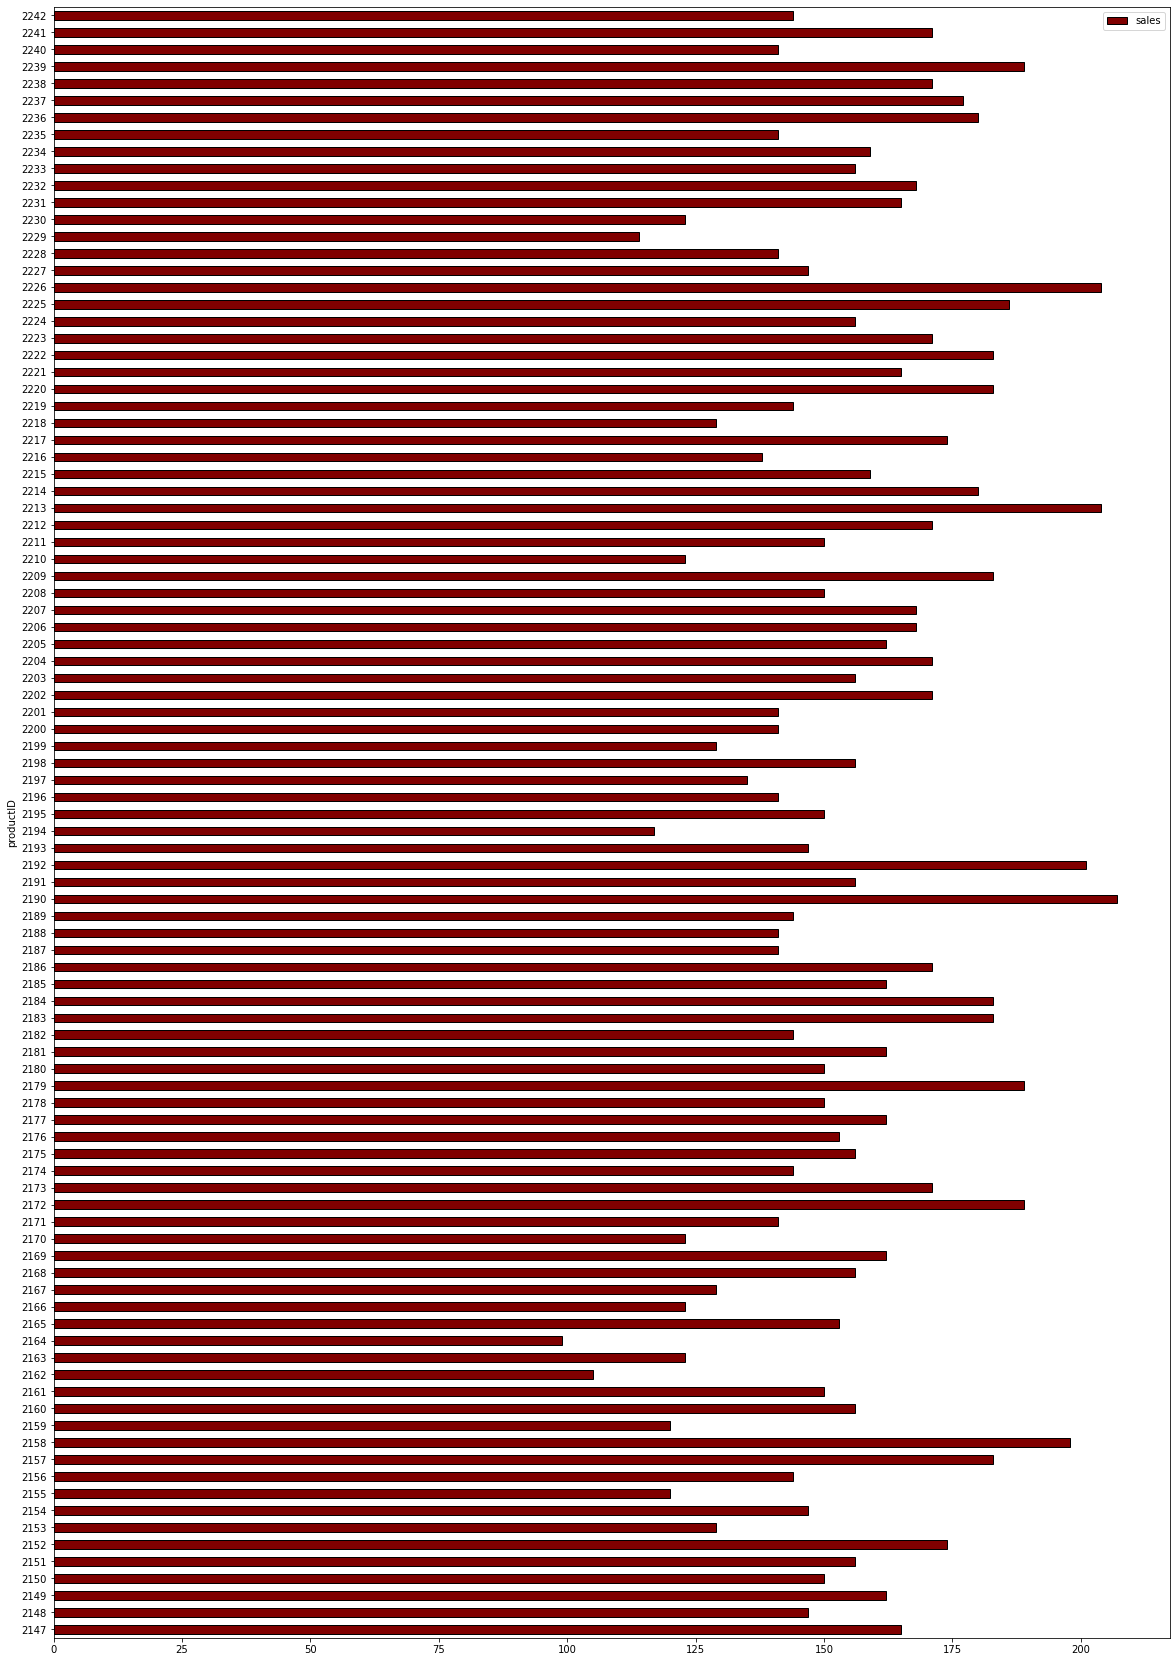

In [11]:
product_past_sales = shoesdf.groupby("productID")["productID"].count().to_frame("sales")
product_past_sales.plot(kind="barh", figsize=(20,30),color='maroon',edgecolor="black")
product_past_sales

In [ ]:
# shoesdf["sales"] = shoesdf.groupby(["date","productID"]).productID.transform("count")

In [ ]:
shoesdf.describe()

In [54]:
shoesdf.shop.unique()

array(['UK2', 'US15', 'CAN7', 'US6', 'UK4', 'GER2', 'CAN5', 'US13', 'UK1',
       'US1', 'US11', 'US2', 'GER1', 'CAN6', 'US7', 'CAN3', 'UK5', 'CAN2',
       'US5', 'CAN1', 'US12', 'US9', 'US4', 'US14', 'US3', 'UK3', 'GER3',
       'US8', 'US10'], dtype=object)

In [ ]:
# shoesdf.groupby("country")["shop"].nunique().plot(kind="pie", label=True)

In [ ]:
# shoesdf["sales"]=shoesdf.groupby(["date","productID"]).productID.transform("count")

,date,country,productID,shop,gender,sizeUS,originalPrice,year,month,sellingPrice
910,2014-05-02,Canada,2147,CAN1,Female,8.0,159,2014,5,143.1
925,2014-05-04,Canada,2147,CAN1,Female,8.0,159,2014,5,143.1
5427,2015-08-08,Canada,2147,CAN1,Female,8.0,159,2015,8,143.1
5156,2015-07-20,Canada,2148,CAN1,Male,9.5,149,2015,7,149.0
8876,2016-03-12,Canada,2148,CAN1,Male,11.0,159,2016,3,79.5
...,...,...,...,...,...,...,...,...,...,...
11032,2016-06-26,United States,2236,US9,Male,9.5,149,2016,6,74.5
11086,2016-06-28,United States,2236,US9,Male,9.5,149,2016,6,74.5
9059,2016-03-22,United States,2240,US9,Female,7.5,129,2016,3,129.0
9327,2016-04-06,United States,2240,US9,Female,7.5,129,2016,4,129.0


**Total Sales & Revenue**
---

First, we Extract the interested data from the raw dataset.
1.    Sales of each product
2.    Sales of each shop in every country 










In [31]:
df = shoesdf.groupby(["country", "shop","productID"]).productID.count().reset_index(name="sales")
df["avgPrice"]=shoesdf.groupby("productID").sellingPrice.transform("mean").round(2)
df["revenue"]= df["avgPrice"] * df["sales"]
df
# sort_df.groupby("productID").sales.sum()

,country,shop,productID,sales,avgPrice,revenue
0,Canada,CAN1,2147,3,142.69,428.07
1,Canada,CAN1,2148,6,145.15,870.90
2,Canada,CAN1,2149,6,141.93,851.58
3,Canada,CAN1,2150,3,138.00,414.00
4,Canada,CAN1,2152,9,148.16,1333.44
...,...,...,...,...,...,...
1977,United States,US9,2232,6,143.56,861.36
1978,United States,US9,2234,3,146.11,438.33
1979,United States,US9,2235,3,145.13,435.39
1980,United States,US9,2236,3,149.28,447.84


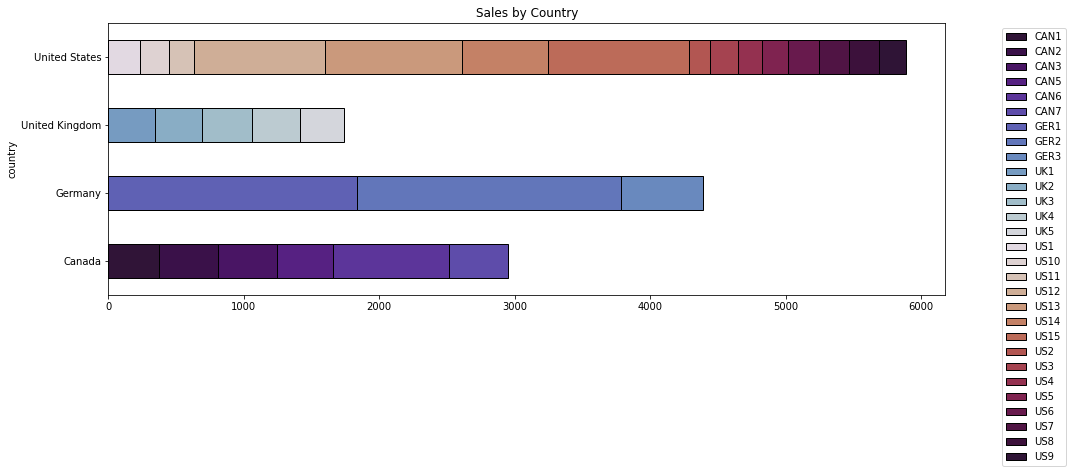

In [277]:
def country_shop(data):
    # df = data.copy(deep=True)
    df = pd.pivot_table(data, index= "country" , values="sales", columns="shop", aggfunc = np.sum)
    df.plot(kind = "barh",stacked =True, figsize=(15,5), title="Sales by Country", colormap = "twilight_shifted", edgecolor="black").legend(loc="best",bbox_to_anchor=(1.15,1))
    return
country_shop(country_shop_df)

,country,shop,productID,sales,avgPrice,revenue
0,Canada,CAN1,2147,3,142.69,428.07
1,Canada,CAN1,2148,6,145.15,870.90
2,Canada,CAN1,2149,6,141.93,851.58
3,Canada,CAN1,2150,3,138.00,414.00
4,Canada,CAN1,2152,9,148.16,1333.44
...,...,...,...,...,...,...
1977,United States,US9,2232,6,143.56,861.36
1978,United States,US9,2234,3,146.11,438.33
1979,United States,US9,2235,3,145.13,435.39
1980,United States,US9,2236,3,149.28,447.84


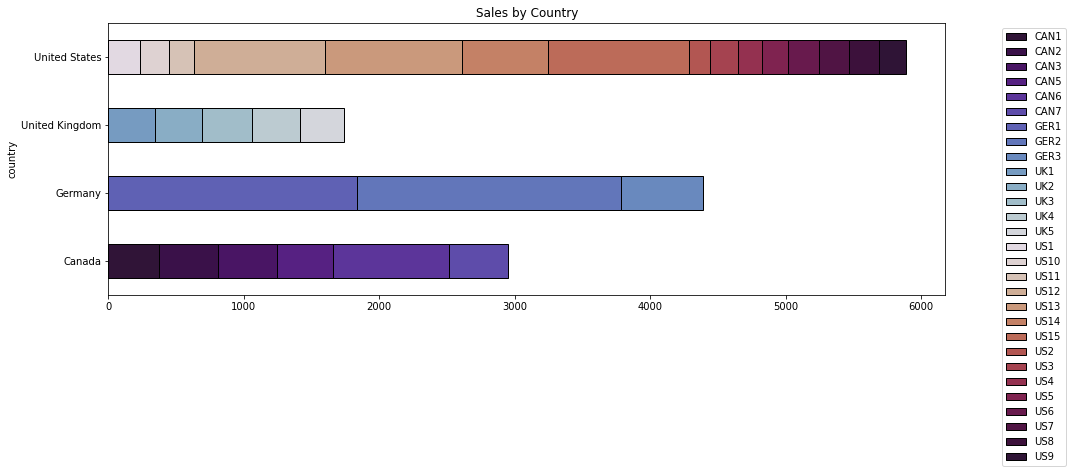

In [167]:
def country_shop(data):
    # df = data.copy(deep=True)
    df1 = pd.pivot_table(data, index= "country" , values="sales", columns="shop", aggfunc = np.sum)
    df1.plot(kind = "barh",stacked =True, figsize=(15,5), title="Sales by Country", colormap = "twilight_shifted", edgecolor="black").legend(loc="best",bbox_to_anchor=(1.15,1))
    # sns.lineplot(df,hue ="shop", x="revenue",figsize=(20,10),subplots=True)
    # return(df)
country_shop(x)
# country_shop_df = shoesdf.groupby(["country", "shop"]).productID.count().reset_index(name="sales")

In [59]:
product_past_sales = shoesdf.groupby("productID")["productID"].count().reset_index(name="sales")
product_past_sales["avgPrice"] = shoesdf.groupby("productID").sellingPrice.transform("mean").round(2)
product_past_sales["revenue"] = product_past_sales["sales"] * product_past_sales["avgPrice"]
product_past_sales

,productID,sales,avgPrice,revenue
0,2147,165,142.69,23543.85
1,2148,147,145.15,21337.05
2,2149,162,141.93,22992.66
3,2150,150,138.00,20700.00
4,2151,156,148.16,23112.96
...,...,...,...,...
91,2238,171,143.37,24516.27
92,2239,189,142.55,26941.95
93,2240,141,137.01,19318.41
94,2241,171,144.51,24711.21


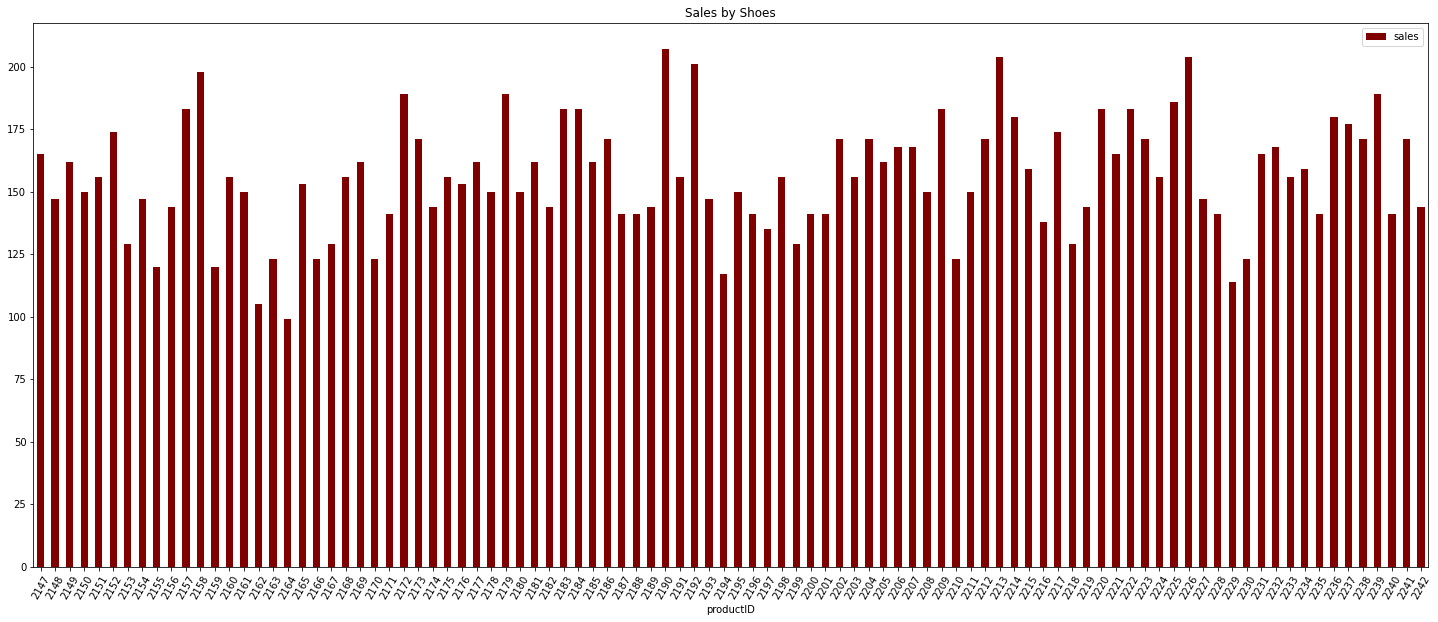

In [60]:
product_past_sales.plot(x = 'productID', y = 'sales',kind="bar", figsize=(25,10),color='maroon', rot = 60, title="Sales by Shoes")

In [ ]:
# shoesdf.groupby(["gender","sizeUS"]).productID.count().unstack().plot()

In [ ]:
# product_past_sales.plot(kind="scatter",x="sales",y="revenue")

In [ ]:
# shoesdf.groupby(["shop","productID"]).count()
# shoesdf.sales.sum()
# shoesdf.shape
# shoesdf.plot(x='shop',y='sales',kind="scatter")

In [ ]:
shop_sales

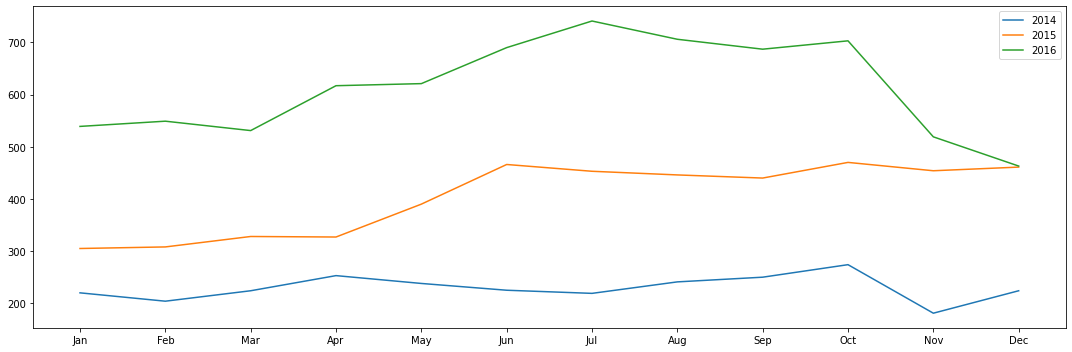

In [271]:
# shoesdf.groupby(["year", "month"])["productID"].count().unstack().plot(kind="bar", figsize=(20,10),colormap="tab20")
y = shoesdf.groupby(["year", "month"])["productID"].count().reset_index(name = "sales").sort_values(by=["year","month"])
y["month"]= pd.to_datetime(y["month"], format="%m").dt.strftime('%b')
fig, ax = plt.subplots(figsize=(15,5))
for year, group in y.groupby('year'):
    ax.plot(group['month'], group['sales'], label=year)

ax.legend()
plt.tight_layout()
plt.show()

In [250]:
y.dtypes

year     int64
month    int64
sales    int64
dtype: object

In [195]:
y["month"] = pd.to_datetime(y["month"], format="%m").dt.strftime('%b')

In [224]:
pd.to_datetime(shoesdf["month"], format="%m").dt.strftime('%b').unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [219]:
pd.to_datetime(shoesdf["month"], format="%m").dt.strftime('%b').unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)